<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Get-current-filename" data-toc-modified-id="Get-current-filename-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Get current filename</a></span></li></ul></li><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules</a></span><ul class="toc-item"><li><span><a href="#General-Modules" data-toc-modified-id="General-Modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>General Modules</a></span></li><li><span><a href="#Tensorflow" data-toc-modified-id="Tensorflow-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tensorflow</a></span></li></ul></li><li><span><a href="#Initialization" data-toc-modified-id="Initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#VRAM-Steup" data-toc-modified-id="VRAM-Steup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>VRAM Steup</a></span></li><li><span><a href="#Initialization-Funtions" data-toc-modified-id="Initialization-Funtions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialization Funtions</a></span></li><li><span><a href="#Initial-Parameters" data-toc-modified-id="Initial-Parameters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Initial Parameters</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Model-Class" data-toc-modified-id="Model-Class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Class</a></span></li><li><span><a href="#Memory-Calculating-Function" data-toc-modified-id="Memory-Calculating-Function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Memory Calculating Function</a></span></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Build Model</a></span></li></ul></li><li><span><a href="#Data-Process" data-toc-modified-id="Data-Process-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Process</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Train-Validation-Split" data-toc-modified-id="Train-Validation-Split-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train-Validation Split</a></span></li><li><span><a href="#Training-Data-Generator" data-toc-modified-id="Training-Data-Generator-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Training Data Generator</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train</a></span><ul class="toc-item"><li><span><a href="#Custom-Loss-and-Metric" data-toc-modified-id="Custom-Loss-and-Metric-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Custom Loss and Metric</a></span></li><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Callbacks</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Training</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Show-some-samples" data-toc-modified-id="Show-some-samples-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Show some samples</a></span></li><li><span><a href="#View-History" data-toc-modified-id="View-History-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>View History</a></span></li><li><span><a href="#Evaluation-For-Timesteps" data-toc-modified-id="Evaluation-For-Timesteps-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Evaluation For Timesteps</a></span></li></ul></li></ul></div>

### Get current filename

In [1]:
import IPython
import time

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
time.sleep(1)
import os
nb_full_path = os.path.join(os.getcwd(), nb_name)
print(nb_full_path)

V:\資料科學與人工智慧實驗室\Google_Contrail\Step3-Train ConvLSTM Model.ipynb


## Import Modules

### General Modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
import platform
import datetime
import pandas as pd
import pickle
import shutil
import importlib
import glob

### Tensorflow

In [5]:
import tensorflow as tf
from keras.utils import io_utils, tf_utils
from tensorflow.keras import (layers, models,
                              utils, optimizers,
                              callbacks, regularizers,
                              losses, activations,
                              applications)
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras import mixed_precision

## Initialization

### VRAM Steup

In [6]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
for gpu in gpus:
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### Initialization Funtions

In [7]:
def making_directories():
    if not os.path.exists('.\\saved_LSTM_model_data\\'):
        os.mkdir('.\\saved_LSTM_model_data\\')
        
    time_str = str(datetime.datetime.now()).split('.')[0].replace(' ','_').replace(' ','').replace(':','')
    this_model_path = '.\\saved_LSTM_model_data\\' + time_str + '\\'
    if not os.path.exists(this_model_path):
        os.mkdir(this_model_path)

    this_weight_path = this_model_path + 'weights\\'
    if not os.path.exists(this_weight_path):
        os.mkdir(this_weight_path)

    this_figure_path = this_model_path + 'figures\\'
    if not os.path.exists(this_figure_path):
        os.mkdir(this_figure_path)
        
    return this_model_path, this_weight_path, this_figure_path

def write_parameters(filename, parameter_dict):
    with open(filename, 'w') as f:
        for col in parameter_dict:
            f.write(f'{col}:{parameter_dict[col]}\n')

class LoadInitialParameters():
    def str_to_bool(self, string):
        if string == 'True':
            Bool = True
        elif string == 'False':
            Bool = False
        return Bool

    def str_to_list(self, string):
        L = string.split('[')[1].split(']')[0].split(',')
        new_L = []
        for l in L:
            try:
                new_L.append(int(l))
            except:
                new_L.append(float(l))
        #L = [int(l) for l in L]
        return new_L
    
    def str_to_nest_list(self, string):
        string.replace(' ','')
        string = string[1:-1]
        order = 0
        for i in string:
            if i == '[':
                order += 1
            else:
                break
        elements = string.split('],[')
        List = []
        for e in elements:
            this_list = self.str_to_list(e)
            List.append(this_list)
        return List
        

    def str_to_test_choice(self, string):
        Ls = string.split('(')[1].split(')')[0].split(',')
        Ls = [Ls[0] + ',' + Ls[1] + ',' + Ls[2], Ls[3] + ',' + Ls[4] + ',' + Ls[5]]
        L = tuple([self.str_to_list(l) for l in Ls])
        return L
    
    def method_selector(self, string):
        try:
            f = float(string)
            if int(f) == f:
                value = int(f)
            else:
                value = f
        except:
            if string[0] == '[':
                if len(string) > 2:
                    if string[1] == '[':
                        value = self.str_to_nest_list(string)
                    else:
                        value = self.str_to_list(string)
                    
                else:
                    value = []
            elif string[0] == '(':
                value = self.str_to_test_choice(string)
            elif string == 'True' or string == 'False':
                value = self.str_to_bool(string)
            else:
                value = string
        return value
    
    def load_initial_parameters(self, filename):
        with open(filename, 'r') as f:
            Ls = f.readlines()
        initial_parameters = {}
        head_tail = 0
        for L in Ls:
            l = L[0:-1]
            col = l.split(':')[0]
            value_str = l.split(':')[1]
            value = self.method_selector(value_str)
            print([col, value, type(value)])
            initial_parameters[col] = value
            globals()[col] = value
        return initial_parameters

### Initial Parameters

In [8]:
running_mode = 'new'
timestream_path = '.\\Segmented_timestream_data\\No_Activation\\'
old_path = '.\\saved_LSTM_model_data\\2024-04-16_123252\\'
lr = 10**(-3.5)

if running_mode == 'new':
    this_model_path, this_weight_path, this_figure_path = making_directories()
    Original_objects = list(globals().keys())

    #   Train parameter
    batch_size = 8
    epochs = 1000
    first_lr = 1e-3

    #####################
    #   Loss Function   #
    #####################

    loss_flag = 'weighted_mse_loss' # 'BCE' or 'IOU' 'asym_IOU', or asym_UFL or perceptual_distance
    weight=0.5; delta=0.6; gamma=0.5

    fold_num = 3
    random_state = 1450

    optuna_sample_mode = 'grid' #'random' or 'grid'
    grid_log_L2 = [-9, -8, -7, -6, -5, -4]
    grid_dropout = [0.05,]
    random_log_L2_range = [-10, -5]
    random_dropout_range = [0, 0.125]

    #######################
    #   Model Parameters  #
    #######################

    block_num = 3
    dropout_factor = 0.02
    L2_factor = 1e-15
    kernel_size = 3
    filter_list = [24, 32, 48, 64, 96, 128]

    ############################################
    #  Writing Parameters and Copy Source Code #
    ############################################
    New_Objects = list(globals().keys())
    for i in Original_objects:
        New_Objects.remove(i)

    for i in New_Objects:
        if i[0] == '_':
            New_Objects.remove(i)
    try:
        New_Objects.remove('Original_objects')
    except:
        pass

    try:
        New_Objects.remove('running_mode')
    except:
        pass

    initial_parameters = {}
    for name in New_Objects:
        initial_parameters[name] = globals()[name]
    initial_parameters['this_model_path'] = this_model_path

    write_parameters(this_model_path + 'initial_parameters.txt', initial_parameters)
    shutil.copyfile(nb_full_path, this_model_path + 'Source_code.ipynb')
elif running_mode == 'continue':
    this_model_path = old_path
    this_weight_path = this_model_path + 'weights\\'
    this_figure_path = this_model_path + 'figures\\'
    LIP = LoadInitialParameters()
    initial_parameters = LIP.load_initial_parameters(this_model_path + 'initial_parameters.txt')

## Model 

### Model Class

In [9]:
class NextFramePrediction():
    def __init__(self,
                 block_num=6,
                 dropout_factor=0,
                 L2_factor=1e-15,
                 kernel_size=3,
                 filter_list=[64, 64, 64, 64, 64, 64],
                 ):
        self.block_num = block_num
        self.dropout_factor = dropout_factor
        self.L2_factor = L2_factor
        self.kernel_size = kernel_size
        self.filter_list = filter_list
        
        self.regularizer = regularizers.L2(L2_factor)
        
    def ConvLSTM_cell(self, input_layer, kernel_size, filters):
        l = layers.ConvLSTM2D(filters=filters,
                              kernel_size=(kernel_size, kernel_size),
                              padding='same',
                              kernel_regularizer=self.regularizer,
                              return_sequences=True,
                              dropout=self.dropout_factor)(input_layer)
        l = layers.BatchNormalization()(l)
        return l
    
    def ExpandDimension(self, input_layer, axis=1):
        shape = (-1,)
        input_shape = input_layer.get_shape()
        input_dim = len(input_shape)
        for i in range(1, input_dim):
            if not i == axis:
                shape += (input_shape[i],)
            else:
                shape += (1,)
                shape += (input_shape[i],)
        l = tf.reshape(input_layer, shape=shape)
        return l
    
    def DownWard_Block(self, input_layer, kernel_size, filters):
        c = self.ConvLSTM_cell(input_layer, kernel_size, filters)
        l = layers.TimeDistributed(layers.MaxPooling2D())(c)
        return c, l
    
    def UpWard_Block(self, input_layer, copied_layer, kernel_size, filters):      
        l = self.ConvLSTM_cell(input_layer, kernel_size, filters)
        l = layers.TimeDistributed(layers.UpSampling2D())(l)
        l = layers.Add()([l, copied_layer])
        return l
    
    def DownWardStream(self, input_layer):
        cs = []
        for i in range(self.block_num):
            if i == 0:
                filters = self.filter_list[i]
                c, l = self.DownWard_Block(input_layer,
                                           self.kernel_size,
                                           filters)
                cs.append(c)
            else:
                filters = self.filter_list[i]
                c, l = self.DownWard_Block(l,
                                           self.kernel_size,
                                           filters)
                cs.append(c)
        return cs, l
    
    def UpWardStream(self, l, cs):
        for i in range(self.block_num-1, -1, -1):
            filters = self.filter_list[i]
            l = self.UpWard_Block(l, cs[i],
                                  self.kernel_size,
                                  filters)
        return l
    
    def LSTM_Body(self, input_layer):
        cs, l = self.DownWardStream(input_layer)
        l = self.UpWardStream(l, cs)
        return l
    
    def Conv2D_Cell(self, input_layer, filters, activation):
        l = layers.Conv2D(filters=filters,
                          kernel_size=[3, 3],
                          activation=activation,
                          padding="same",
                          kernel_regularizer=self.regularizer)(input_layer)
        l = layers.BatchNormalization()(l)
        l = layers.Dropout(self.dropout_factor)(l)
        return l
    
    def Output_Stem(self, input_layer):
        l = layers.Conv3D(filters=int(np.sqrt(input_layer.shape[-1]*3)),
                          kernel_size=3,
                          activation="relu",
                          padding="same",
                          kernel_regularizer=self.regularizer)(input_layer)
        l = layers.BatchNormalization()(l)
        l = layers.Dropout(self.dropout_factor)(l)
        l = layers.Conv2D(filters=3,
                          kernel_size=1,
                          activation="sigmoid",
                          padding="same")(l)
        return l
    
    def Build_Model(self, input_shape):
        input_layer = layers.Input(input_shape)
        l_F = self.LSTM_Body(input_layer[:,0:4,...])
        l_B = self.LSTM_Body(input_layer[:,-1:-4:-1,...])
        l_middle = layers.Concatenate()([l_F[:,-1,...], l_B[:,-1,...]])
        l_middle = self.Conv2D_Cell(l_middle, 64, activation='relu')
        l_middle = self.Conv2D_Cell(l_middle, l_F.shape[-1], activation='relu')
        l = layers.Concatenate(axis=1)([l_F[:,0:-1,...], self.ExpandDimension(l_middle, axis=1),
                                        l_B[:,-2::-1,...]])
        l = self.Output_Stem(l)
        model = models.Model(input_layer, l)
        return model
    

### Memory Calculating Function

In [10]:
def model_feature_memory_calculator(model, batch_size):
    size_per_float = 4
    
    feature_mem_every_layer = []
    layer_names = []
    for i, l in enumerate(model.layers):
        this_name = l.name
        layer_names.append(this_name)
        out_shape = l.output_shape
        
        if type(out_shape) is list:
            out_shape = out_shape[0]
        else:
            out_shape = [out_shape[i] for i in range(1, len(out_shape))]
        
        this_feature_mem = size_per_float
        for s in out_shape:
            if not s is None:
                this_feature_mem *= s
        this_feature_mem /= (1024.0*1024.0) 
        this_feature_mem *= batch_size
        feature_mem_every_layer.append(this_feature_mem)
        
        print(f'{i:04d}. {this_name:>30s}, Mem for this layer: {this_feature_mem:8.2f}MB, \
        Sum of Mem: {np.sum(feature_mem_every_layer):8.2f}MB')

### Build Model

In [11]:
model_mod = NextFramePrediction(block_num=block_num,
                                dropout_factor=dropout_factor,
                                L2_factor=L2_factor,
                                kernel_size=kernel_size,
                                filter_list=filter_list)
model = model_mod.Build_Model((8, 256, 256, 3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 256, 256  0           []                               
                                , 3)]                                                             
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 4, 256, 256,  0          ['input_1[0][0]']                
 ingOpLambda)                    3)                                                               
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 3, 256, 256,  0          ['input_1[0][0]']                
 icingOpLambda)                  3)                                                           

                                                                                                  
 add (Add)                      (None, 4, 64, 64, 4  0           ['time_distributed_3[0][0]',     
                                8)                                'batch_normalization_2[0][0]']  
                                                                                                  
 add_3 (Add)                    (None, 3, 64, 64, 4  0           ['time_distributed_9[0][0]',     
                                8)                                'batch_normalization_8[0][0]']  
                                                                                                  
 conv_lstm2d_4 (ConvLSTM2D)     (None, 4, 64, 64, 3  92288       ['add[0][0]']                    
                                2)                                                                
                                                                                                  
 conv_lstm

                                                                                                  
 tf.__operators__.getitem_4 (Sl  (None, 3, 256, 256,  0          ['add_2[0][0]']                  
 icingOpLambda)                  24)                                                              
                                                                                                  
 tf.reshape (TFOpLambda)        (None, 1, 256, 256,  0           ['dropout_1[0][0]']              
                                 24)                                                              
                                                                                                  
 tf.__operators__.getitem_5 (Sl  (None, 2, 256, 256,  0          ['add_5[0][0]']                  
 icingOpLambda)                  24)                                                              
                                                                                                  
 concatena

In [12]:
model_feature_memory_calculator(model, batch_size=batch_size)

0000.                        input_1, Mem for this layer:    48.00MB,         Sum of Mem:    48.00MB
0001.       tf.__operators__.getitem, Mem for this layer:    24.00MB,         Sum of Mem:    72.00MB
0002.     tf.__operators__.getitem_1, Mem for this layer:    18.00MB,         Sum of Mem:    90.00MB
0003.                    conv_lstm2d, Mem for this layer:   192.00MB,         Sum of Mem:   282.00MB
0004.                  conv_lstm2d_6, Mem for this layer:   144.00MB,         Sum of Mem:   426.00MB
0005.            batch_normalization, Mem for this layer:   192.00MB,         Sum of Mem:   618.00MB
0006.          batch_normalization_6, Mem for this layer:   144.00MB,         Sum of Mem:   762.00MB
0007.               time_distributed, Mem for this layer:    48.00MB,         Sum of Mem:   810.00MB
0008.             time_distributed_6, Mem for this layer:    36.00MB,         Sum of Mem:   846.00MB
0009.                  conv_lstm2d_1, Mem for this layer:    64.00MB,         Sum of Mem:  

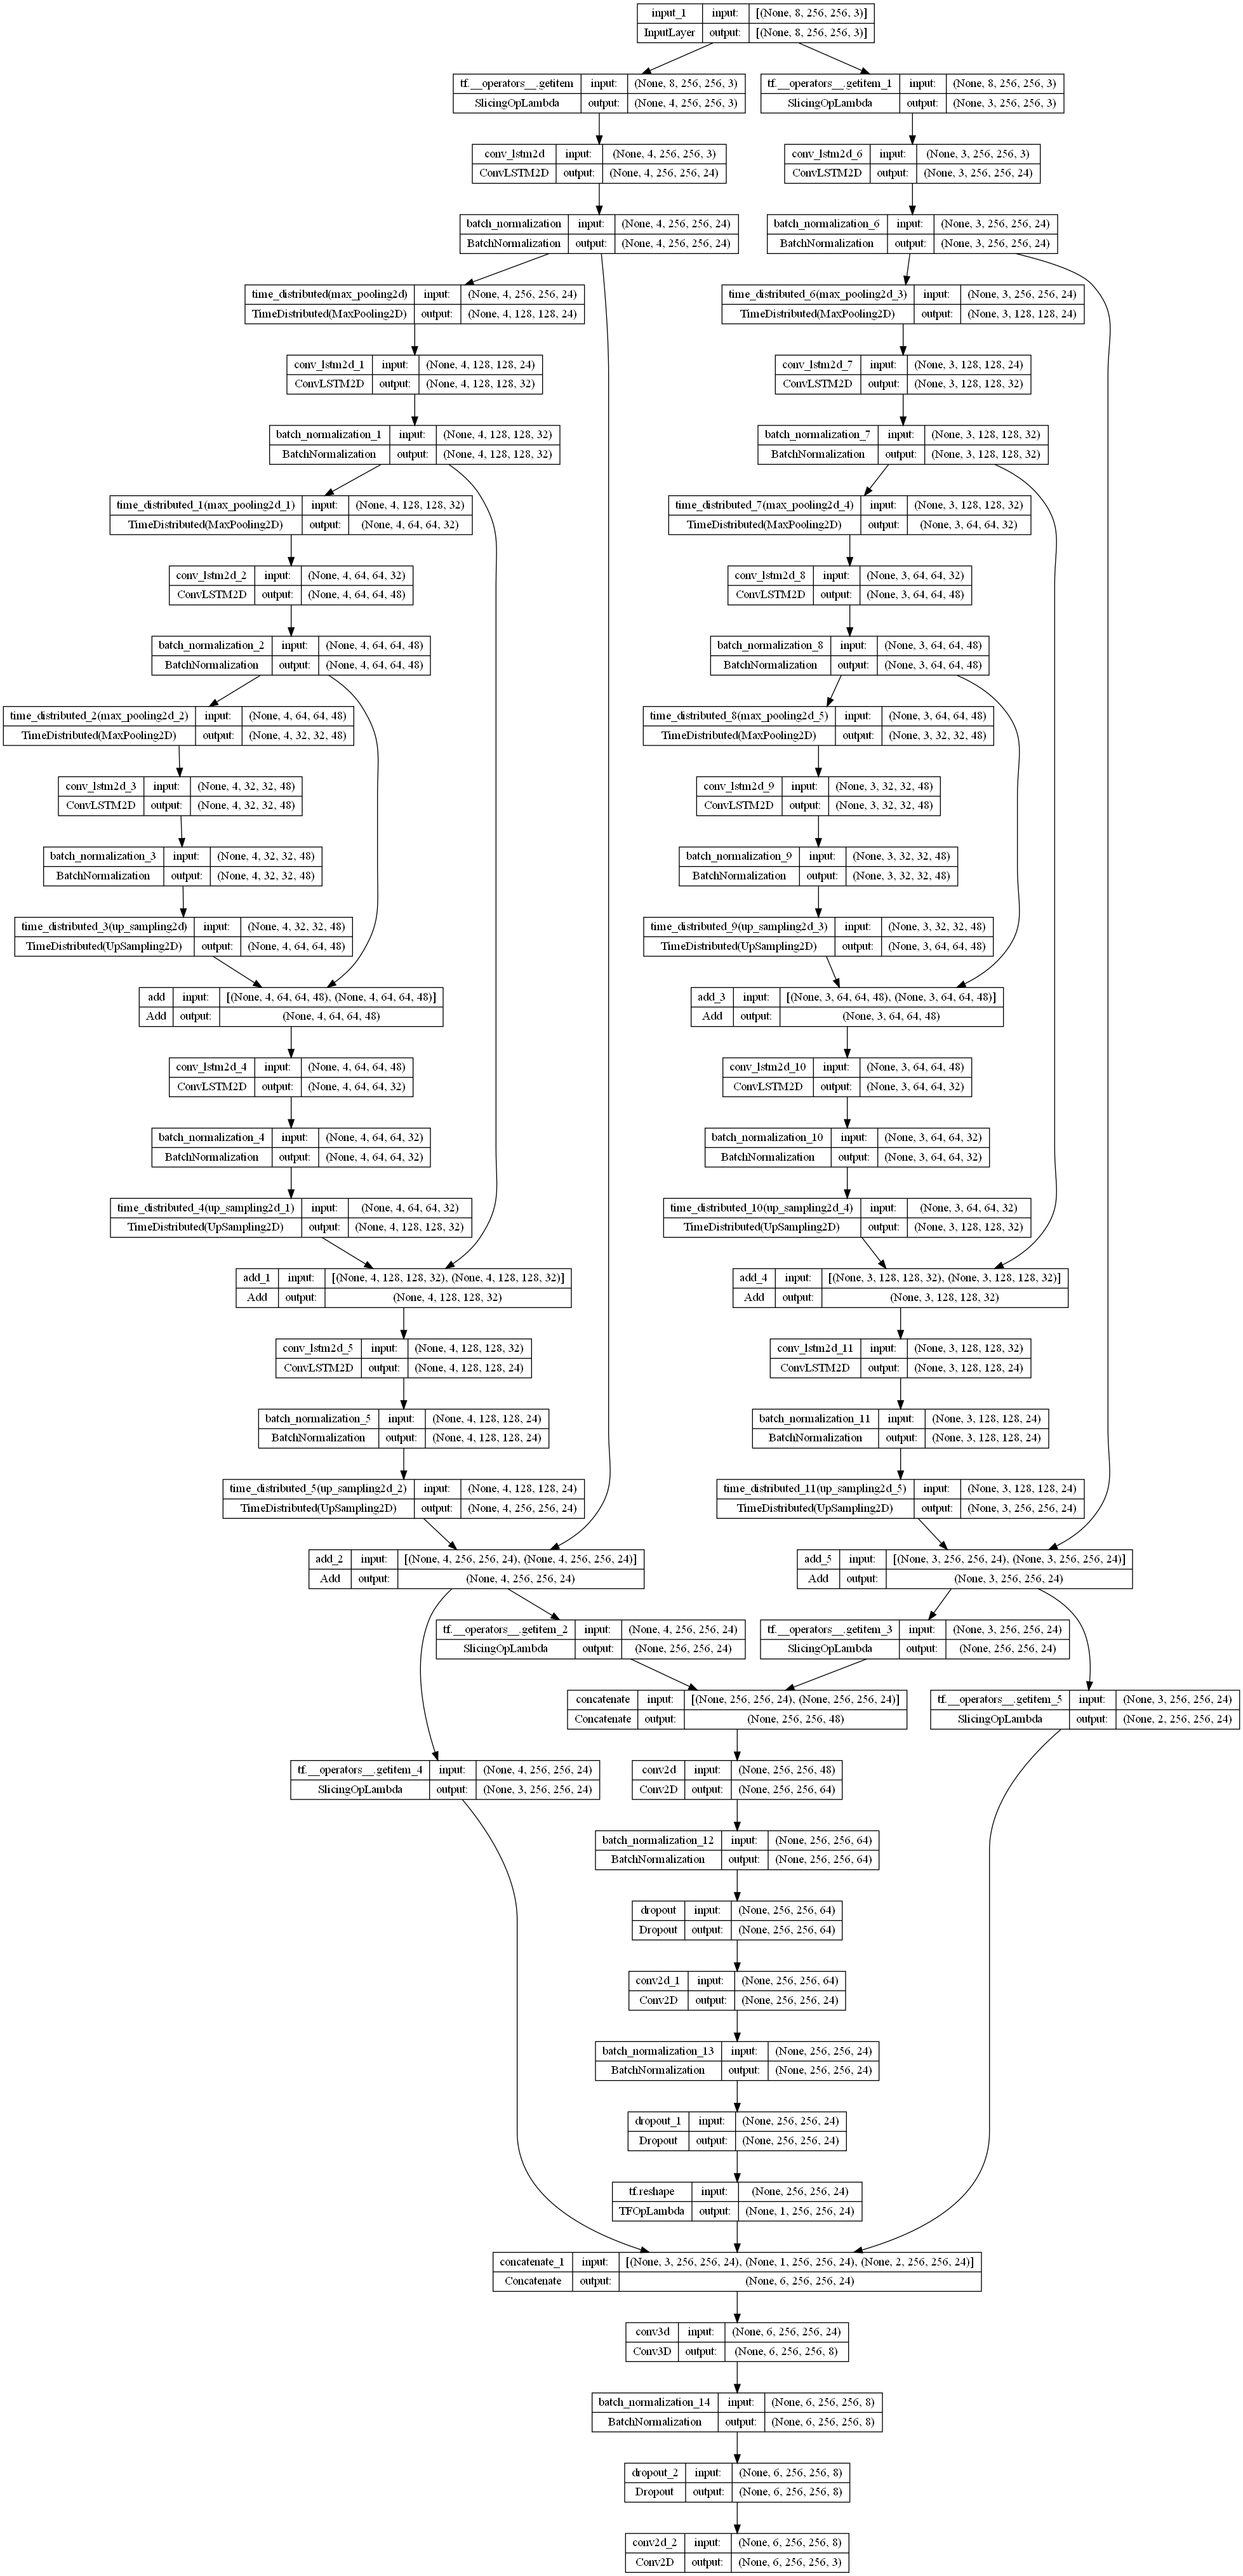

In [13]:
utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file = this_figure_path + 'model.png')

## Data Process

### Load Data

In [14]:
def load_data_from_filelist(filelist):
    num_file = len(filelist)

    Xs = []
    ys = []
    for i in tqdm(range(num_file)):
        y_filename = filelist[i]
        X_filename = y_filename.replace('_GroundTruth', '')

        Xs.append(np.load(X_filename))
        ys.append(np.load(y_filename))

    Xs = np.array(Xs).astype(np.float32)
    ys = np.array(ys).astype(np.float32)
    return Xs, ys

In [15]:
with open(f'fold_{fold_num:02d}.txt', 'r') as f:
    filenames = f.readlines()

In [16]:
for i in range(len(filenames)):
    this_fn = filenames[i]
    filenames[i] = timestream_path + this_fn[2:-1].replace('/', '_') + '_GroundTruth.npy'
filenames = filenames[0:1500]

In [17]:
#filenames = glob.glob(timestream_path+'*GroundTruth.npy')
Xs, ys = load_data_from_filelist(filenames)

Movie_Xs = Xs[:,:,:,:,:]
Movie_ys = Xs[:,1:7,:,:,:]

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:31<00:00,  7.08it/s]


In [18]:
Movie_Xs.shape

(1500, 8, 256, 256, 3)

In [19]:
print(Movie_Xs.shape)
print(Movie_ys.shape)
print(f'Max of X: {np.max(Movie_Xs):.2f}')
print(f'Min of X: {np.min(Movie_Xs):.2f}')
print(f'Mean of X: {np.mean(Movie_Xs):.2f}')
print(f'Median of X: {np.median(Movie_Xs):.2f}')

(1500, 8, 256, 256, 3)
(1500, 6, 256, 256, 3)
Max of X: 0.73
Min of X: 0.00
Mean of X: 0.11
Median of X: 0.10


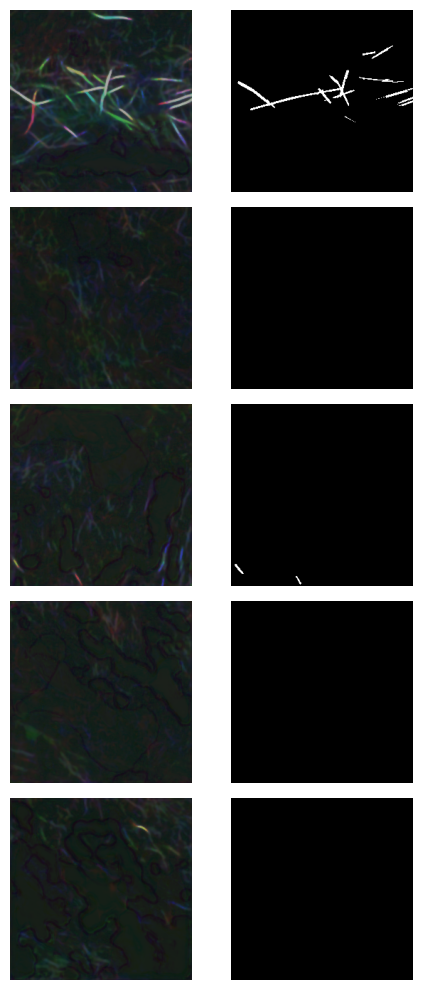

In [20]:
fig, axes = plt.subplots(5, 2)
for i in range(5):
    k = np.random.randint(Xs.shape[0])
    axes[i][0].imshow(Xs[k,3,...])
    axes[i][1].imshow(ys[k], cmap='gray')
    axes[i][0].axis('off')
    axes[i][1].axis('off')
fig.set_size_inches(5, 10)
fig.tight_layout()

### Train-Validation Split

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(Movie_Xs,
                                                      Movie_ys,
                                                      test_size=0.2,
                                                      random_state=random_state)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(1200, 8, 256, 256, 3)
(1200, 6, 256, 256, 3)
(300, 8, 256, 256, 3)
(300, 6, 256, 256, 3)


### Training Data Generator

In [22]:
class Train_Data_Generators(utils.Sequence):
    def __init__(self, X, y,
                 batch_size=32,
                 iaa_aug=False,
                 augmentation_rate=0.5,
                 rotate_rate=0.3,
                 rot90_rate=1,
                 filp_rate=1
                 ):
        self.X = X
        self.y = y
        self.train_size = X.shape[0]
        self.patch_size = X.shape[2]
        self.channel_num = X.shape[4]
        self.time_steps = X.shape[1]
        self.batch_size = batch_size
        self.iaa_aug = iaa_aug
        self.augmentation_rate = augmentation_rate
        self.batch_num = int(np.ceil(self.train_size / self.batch_size))
        self.idx = [*range(self.train_size)]
        self.rotate_rate = rotate_rate
        self.rot90_rate = rot90_rate
        self.filp_rate = filp_rate
        #np.random.shuffle(self.idx)
        
        if self.iaa_aug:
            if aug_method == 'Squential': 
                self.seq = iaa.Sequential([                   
                    iaa.Sometimes(self.filp_rate, iaa.Fliplr(0.5)),
                    iaa.Sometimes(self.rot90_rate, iaa.Rot90([0, 1, 2, 3])),
                    iaa.Sometimes(self.rotate_rate, iaa.Affine(rotate=(-45, 45))),
                ])
            elif aug_method == 'SomeOf':
                self.seq = iaa.SomeOf(num_aug, [
                iaa.Fliplr(0.5), # 50% horizontal flip
                iaa.Rot90([0, 1, 2, 3]),
                iaa.Affine(rotate=(-45, 45)),# random rotate -10 ~ +10 degree
    #             iaa.Affine(shear=(-16,16)),
    #             iaa.Dropout(p=(0, 0.05)),
    #             iaa.AdditiveGaussianNoise(scale=(0, 0.1), per_channel=True),# random shear -16 ~ +16 degree
    #             iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}), # scale x, y: 80%~120%
        ])
    def on_epoch_begin(self):
        np.random.shuffle(self.idx)
        
    def __len__(self):
        return self.batch_num
        
    def __getitem__(self, index):
        this_X = np.empty((self.batch_size, self.time_steps,
                           self.patch_size, self.patch_size,
                           self.channel_num), dtype='float32')
        this_y = np.empty((self.batch_size, self.time_steps - 2, 
                           self.patch_size, self.patch_size, 3), dtype='float32')
        this_list = self.idx[index*self.batch_size:(index+1)*self.batch_size]
        
        for i in range(len(this_list)):
            this_X[i,...] = self.X[this_list[i]]
            this_y[i,...] = self.y[this_list[i]]
        
        original_size = this_X.shape
        if self.iaa_aug:
            if len(original_size) == 5:
                this_X = np.reshape(this_X, (this_X.shape[0], this_X.shape[1], this_X.shape[2], -1))

            this_X, this_y = self.seq(images=this_X, heatmaps=this_y.astype(np.float32))
            
            if len(original_size) == 5:
                this_X = np.reshape(this_X, original_size)
        return this_X, this_y

In [23]:
TG = Train_Data_Generators(X_train, y_train, batch_size=batch_size)
TG0 = TG[0]
print(TG0[0].shape)
print(TG0[1].shape)

(8, 8, 256, 256, 3)
(8, 6, 256, 256, 3)


## Train

### Custom Loss and Metric

In [24]:
class Custom_Losses_and_metrics():
    def hybrid_loss(self, y_true, y_pred):
#         y_true_f = np.float32(K.flatten(y_true))
#         y_pred_f = np.float32(K.flatten(y_pred))
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        epsilon = 1e-7
        
        #-----Cross Entropy Part
        Loss_en = K.mean(y_true_f * K.log(y_pred_f + K.epsilon()))
        
        #-----Dice Part
        G = y_true_f * y_pred_f
        Loss_dice = K.mean( G/ \
                          (y_true_f**2 + y_pred_f**2 + K.epsilon()))
        Loss = -(Loss_en + Loss_dice)
        return Loss
    
    def weighted_mse_loss(self, weights = [1,1,1,1,1,1]):
        def loss_function(y_true, y_pred):
            weighted_losses = []
            for i in range(6):
                y_true_f = K.flatten(y_true[:,i,...])
                y_pred_f = K.flatten(y_pred[:,i,...])
                this_loss = K.mean((y_true_f - y_pred_f)**2)
                weighted_losses.append(this_loss * weights[i])
            mean_loss = K.sum(weighted_losses) / np.sum(weights)
            return mean_loss * 100
        return loss_function
        
    
    def dice_loss(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        epsilon = 1e-7
        
        TP = K.mean(y_true_f * y_pred_f)
        FP = K.mean(y_pred_f) - TP
        FN = K.mean(y_true_f) - TP
        
        Loss = 1 - (2 * TP + epsilon) / (2 * TP + FP + FN + epsilon)
        return Loss
    
    def Sorensen_Dice_loss(self, y_true, y_pred):
        coef = self.Sorensen_Dice_coef(y_true, y_pred)
        loss = 1 - coef
        return loss
    
    def recall(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        tp = K.sum(y_true_f * y_pred_f)
        fn = K.sum(y_true_f) - tp
        r = (tp + K.epsilon()) / (tp + fn + K.epsilon())
        return r
    
    def precision(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        tp = K.sum(y_true_f * y_pred_f)
        fp = K.sum(y_pred_f) - tp
        p = (tp + K.epsilon()) / (tp + fp + K.epsilon())
        return p
    
    def negative_precision(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        tp = K.mean(y_true_f * y_pred_f)
        fp = K.mean(y_pred_f) - tp
        fn = K.mean(y_true_f) - tp
        tn = 1 - tp - fp - fn
        neg_p = (tn + K.epsilon()) / (tn + fn + K.epsilon())
        return neg_p

    def Sorensen_Dice_coef(self, y_true, y_pred):
        beta = 0.5
#         y_true_f = K.flatten(y_true)
#         y_pred_f = K.flatten(y_pred)
#         tp = K.sum(y_true_f * y_pred_f)
#         fp = K.sum(y_pred_f) - tp
#         fn = K.sum(y_true_f) - tp
#         p = (tp + K.epsilon()) / (tp + fp + K.epsilon())
#         r = (tp + K.epsilon()) / (tp + fn + K.epsilon())
        p = self.precision(y_true, y_pred)
        r = self.recall(y_true, y_pred)

        coef = ((1 + beta**2) * p * r + K.epsilon()**2) / ((beta**2) * p + r + K.epsilon()**2)

        return coef
    
    def Dice(self, y_true, y_pred):
        p = self.precision(y_true, y_pred)
        r = self.recall(y_true, y_pred)

        coef = (2 * p * r + K.epsilon()**2) / (p + r + K.epsilon()**2)

        return coef
    
    def IOU(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        epsilon = 1e-10
        
        tp = K.mean(y_true_f * y_pred_f)
        fp = K.mean(y_pred_f) - tp
        fn = K.mean(y_true_f) - tp
        
        IOU = tp / (fp + fn + tp + epsilon)
        return IOU
    
    def IOU_loss(self, y_true, y_pred):
        loss = 1 - self.IOU(y_true, y_pred)
        return loss
    
    def one_hot(self, y):
        y = tf.concat([1 - y, y], axis=-1)
        return y
    
    # Helper function to enable loss function to be flexibly used for 
    # both 2D or 3D image segmentation - source: https://github.com/frankkramer-lab/MIScnn
    def identify_axis(self, shape):
        # Three dimensional
        if len(shape) == 5 : return [1,2,3]
        # Two dimensional
        elif len(shape) == 4 : return [1,2]
        # Exception - Unknown
        else : raise ValueError('Metric: Shape of tensor is neither 2D or 3D.')
    
    def symmetric_focal_loss(self, delta=0.7, gamma=2.):
        """
        Parameters
        ----------
        delta : float, optional
            controls weight given to false positive and false negatives, by default 0.7
        gamma : float, optional
            Focal Tversky loss' focal parameter controls degree of down-weighting of easy examples, by default 2.0
        """
        def loss_function(y_true, y_pred):
            if y_pred.get_shape()[-1] == 1:
                y_true = self.one_hot(y_true)
                y_pred = self.one_hot(y_pred)
            
            axis = self.identify_axis(y_true.get_shape())  

            epsilon = K.epsilon()
            y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
            cross_entropy = -y_true * K.log(y_pred)
            #calculate losses separately for each class
            back_ce = K.pow(1 - y_pred[:,:,:,0], gamma) * cross_entropy[:,:,:,0]
            back_ce =  (1 - delta) * back_ce

            fore_ce = K.pow(1 - y_pred[:,:,:,1], gamma) * cross_entropy[:,:,:,1]
            fore_ce = delta * fore_ce

            loss = K.mean(K.sum(tf.stack([back_ce, fore_ce],axis=-1),axis=-1))

            return loss

        return loss_function
    
    #################################
    # Symmetric Focal Tversky loss  #
    #################################
    def symmetric_focal_tversky_loss(self, delta=0.7, gamma=0.75):
        """This is the implementation for binary segmentation.
        Parameters
        ----------
        delta : float, optional
            controls weight given to false positive and false negatives, by default 0.7
        gamma : float, optional
            focal parameter controls degree of down-weighting of easy examples, by default 0.75
        """
        def loss_function(y_true, y_pred):
            
            if y_pred.get_shape()[-1] == 1:
                y_true = self.one_hot(y_true)
                y_pred = self.one_hot(y_pred)
            
            # Clip values to prevent division by zero error
            epsilon = K.epsilon()
            y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

            axis = self.identify_axis(y_true.get_shape())
            # Calculate true positives (tp), false negatives (fn) and false positives (fp)     
            tp = K.sum(y_true * y_pred, axis=axis)
            fn = K.sum(y_true * (1-y_pred), axis=axis)
            fp = K.sum((1-y_true) * y_pred, axis=axis)
            dice_class = (tp + epsilon)/(tp + delta*fn + (1-delta)*fp + epsilon)

            #calculate losses separately for each class, enhancing both classes
            back_dice = (1-dice_class[:,0]) * K.pow(1-dice_class[:,0], -gamma) 
            fore_dice = (1-dice_class[:,1]) * K.pow(1-dice_class[:,1], -gamma) 

            # Average class scores
            loss = K.mean(tf.stack([back_dice,fore_dice],axis=-1))
            return loss

        return loss_function

    ################################
    #     Asymmetric Focal loss    #
    ################################
    def asymmetric_focal_loss(self, delta=0.7, gamma=2.):
        """For Imbalanced datasets
        Parameters
        ----------
        delta : float, optional
            controls weight given to false positive and false negatives, by default 0.7
        gamma : float, optional
            Focal Tversky loss' focal parameter controls degree of down-weighting of easy examples, by default 2.0
        """ 
        def loss_function(y_true, y_pred):
        
            if y_pred.get_shape()[-1] == 1:
                y_true = self.one_hot(y_true)
                y_pred = self.one_hot(y_pred)
                
            axis = self.identify_axis(y_true.get_shape())  

            epsilon = K.epsilon()
            y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
            cross_entropy = -y_true * K.log(y_pred)

            #calculate losses separately for each class, only suppressing background class
            back_ce = K.pow(1 - y_pred[:,:,:,0], gamma) * cross_entropy[:,:,:,0]
            back_ce =  (1 - delta) * back_ce

            fore_ce = cross_entropy[:,:,:,1]
            fore_ce = delta * fore_ce

            loss = K.mean(K.sum(tf.stack([back_ce, fore_ce],axis=-1),axis=-1))

            return loss

        return loss_function

    #################################
    # Asymmetric Focal Tversky loss #
    #################################
    def asymmetric_focal_tversky_loss(self, delta=0.7, gamma=0.75):
        """This is the implementation for binary segmentation.
        Parameters
        ----------
        delta : float, optional
            controls weight given to false positive and false negatives, by default 0.7
        gamma : float, optional
            focal parameter controls degree of down-weighting of easy examples, by default 0.75
        """
        def loss_function(y_true, y_pred):
            # Clip values to prevent division by zero error
            if y_pred.get_shape()[-1] == 1:
                y_true = self.one_hot(y_true)
                y_pred = self.one_hot(y_pred)
            epsilon = K.epsilon()
            y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

            axis = self.identify_axis(y_true.get_shape())
            # Calculate true positives (tp), false negatives (fn) and false positives (fp)     
            tp = K.sum(y_true * y_pred, axis=axis)
            fn = K.sum(y_true * (1-y_pred), axis=axis)
            fp = K.sum((1-y_true) * y_pred, axis=axis)
            dice_class = (tp + epsilon)/(tp + delta*fn + (1-delta)*fp + epsilon)

            #calculate losses separately for each class, only enhancing foreground class
            back_dice = (1-dice_class[:,0]) 
            fore_dice = (1-dice_class[:,1]) * K.pow(1-dice_class[:,1], -gamma) 

            # Average class scores
            loss = K.mean(tf.stack([back_dice,fore_dice],axis=-1))
            return loss

        return loss_function
    
    #################################
    # Asymmetric Focal IOU loss #
    #################################
    def asymmetric_focal_IOU_loss(self, delta=0.5, gamma=0.75):
        """This is the implementation for binary segmentation.
        Parameters
        ----------
        delta : float, optional
            controls weight given to false positive and false negatives, by default 0.7
        gamma : float, optional
            focal parameter controls degree of down-weighting of easy examples, by default 0.75
        """
        def loss_function(y_true, y_pred):
            # Clip values to prevent division by zero error
            if y_pred.get_shape()[-1] == 1:
                y_true = self.one_hot(y_true)
                y_pred = self.one_hot(y_pred)
            epsilon = K.epsilon()
            y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

            axis = self.identify_axis(y_true.get_shape())
            # Calculate true positives (tp), false negatives (fn) and false positives (fp)     
            tp = K.sum(y_true * y_pred, axis=axis)
            fn = K.sum(y_true * (1-y_pred), axis=axis)
            fp = K.sum((1-y_true) * y_pred, axis=axis)
            IOU_class = (tp + epsilon)/(tp + delta*2*fn + (2-delta*2)*fp + epsilon)

            #calculate losses separately for each class, only enhancing foreground class
            back_IOU = (1-IOU_class[:,0]) 
            fore_IOU = (1-IOU_class[:,1]) * K.pow(1-IOU_class[:,1], -gamma) 

            # Average class scores
            loss = K.mean(tf.stack([back_IOU,fore_IOU],axis=-1))
            return loss

        return loss_function


    ###########################################
    #      Symmetric Unified Focal loss       #
    ###########################################
    def sym_unified_focal_loss(self, weight=0.5, delta=0.6, gamma=0.5):
        """The Unified Focal loss is a new compound loss function that unifies Dice-based and cross entropy-based loss functions into a single framework.
        Parameters
        ----------
        weight : float, optional
            represents lambda parameter and controls weight given to symmetric Focal Tversky loss and symmetric Focal loss, by default 0.5
        delta : float, optional
            controls weight given to each class, by default 0.6
        gamma : float, optional
            focal parameter controls the degree of background suppression and foreground enhancement, by default 0.5
        """
        def loss_function(y_true,y_pred):
            symmetric_ftl = self.symmetric_focal_tversky_loss(delta=delta, gamma=gamma)(y_true,y_pred)
            symmetric_fl = self.symmetric_focal_loss(delta=delta, gamma=gamma)(y_true,y_pred)
            if weight is not None:
                return (weight * symmetric_ftl) + ((1-weight) * symmetric_fl)  
            else:
                return symmetric_ftl + symmetric_fl

        return loss_function

    ###########################################
    #      Asymmetric Unified Focal loss      #
    ###########################################
    def asym_unified_focal_loss(self, weight=0.5, delta=0.6, gamma=0.5):
        """The Unified Focal loss is a new compound loss function that unifies Dice-based and cross entropy-based loss functions into a single framework.
        Parameters
        ----------
        weight : float, optional
            represents lambda parameter and controls weight given to asymmetric Focal Tversky loss and asymmetric Focal loss, by default 0.5
        delta : float, optional
            controls weight given to each class, by default 0.6
        gamma : float, optional
            focal parameter controls the degree of background suppression and foreground enhancement, by default 0.5
        """
        def loss_function(y_true,y_pred):
            asymmetric_ftl = self.asymmetric_focal_tversky_loss(delta=delta, gamma=gamma)(y_true,y_pred)
            asymmetric_fl = self.asymmetric_focal_loss(delta=delta, gamma=gamma)(y_true,y_pred)
            if weight is not None:
                return (weight * asymmetric_ftl) + ((1-weight) * asymmetric_fl)  
            else:
                return asymmetric_ftl + asymmetric_fl

        return loss_function
    
    def perceptual_distance(self, y_true, y_pred):
        y_true *= 255.
        y_pred *= 255.
        rmean = (y_true[..., 0] + y_pred[..., 0]) / 2
        r = y_true[..., 0] - y_pred[..., 0]
        g = y_true[..., 1] - y_pred[..., 1]
        b = y_true[..., 2] - y_pred[..., 2]

        return K.mean(K.sqrt((((512+rmean)*r*r)/256) + 4*g*g + (((767-rmean)*b*b)/256)))
    
    def rgb_distance(self, y_true, y_pred):
        y_true *= 255.
        y_pred *= 255.
        r = y_true[..., 0] - y_pred[..., 0]
        g = y_true[..., 1] - y_pred[..., 1]
        b = y_true[..., 2] - y_pred[..., 2]

        return K.mean(K.sqrt(3*r*r + 3*g*g + 3*b*b))
    
    
    def focal_mse(self, gamma=0.5):
        def loss_function(y_true, y_pred):
            e = y_true - y_pred
            se = e * e
            focal_se = K.pow(se, gamma)
            focal_mse = K.mean(focal_se) * 10
            return focal_mse
        return loss_function
    

In [25]:
CLM = Custom_Losses_and_metrics()
IOU = CLM.IOU
Dice = CLM.Dice
perceptual_distance = CLM.perceptual_distance
rgb_distance = CLM.rgb_distance
early_stop_rate=1/1010.0
if loss_flag == 'BCE':
    loss = tf.keras.losses.binary_crossentropy
elif loss_flag == 'IOU':
    loss = CLM.IOU_loss
elif loss_flag == 'Dice':
    loss = CLM.dice_loss
elif loss_flag == 'asym_UFL':
    loss = CLM.asym_unified_focal_loss(weight=weight, delta=delta, gamma=gamma)
elif loss_flag == 'asym_IOU':
    loss = CLM.asymmetric_focal_IOU_loss()
elif loss_flag == 'asym_TVE':
    loss = CLM.asymmetric_focal_tversky_loss()
elif loss_flag == 'mse':
    loss = 'mse'
elif loss_flag == 'focal_mse':
    loss = CLM.focal_mse
elif loss_flag == 'weighted_mse_loss':
    loss = CLM.weighted_mse_loss()
    early_stop_rate = 10**(-1.51)

### Callbacks

In [26]:
class Custom_CallBack_LR_Modification(callbacks.Callback):
    def __init__(self,
        filepath,
        monitor="val_loss",
        factor=0.1,
        patience=10,
        verbose=0,
        mode="auto",
        min_delta=5e-5,
        cooldown=0,
        moving_mean_counts=100,
        min_lr=0,
        early_stop=True,
        early_stop_rate=1/1010.0,
        warm_up=10,
        scheduled_lr = [[100, 10**(-3.5)], [200, 10**(-4)], [300, 10**(-4.5)], [400, 10**(-5)]],
        **kwargs,
    ):
        super().__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.factor = factor
        self.min_lr = min_lr
        self.min_delta = min_delta
        self.patience = patience
        self.patience_B = patience
        self.verbose = verbose
        self.cooldown = cooldown
        self.moving_mean_counts = moving_mean_counts
        self.cooldown_counter = 0  # Cooldown counter.
        self.reduce_rate = 1
        self.early_stop = early_stop
        self.early_stop_rate = early_stop_rate
        self.stream = []
        self.wait = 0
        self.best = 0
        self.mode = mode
        self.monitor_op = None
        self._reset()
        self.scheduled_lr = scheduled_lr
        self.current_epoch = 0
        self.warm_up = warm_up
    
    def _Sigma_Mean(self, X, sigma=3, max_iter=100):
#         print(X)
        run = True
        iteration = 0
        this_X = np.array(X)
#         print(type(this_X))
#         print(this_X.shape)
        while run:
            previous_length = this_X.shape[0]
            mean = np.mean(this_X)
            std = np.std(this_X)
            if std > 0:
                sig = np.abs((this_X - mean)/std)
                this_X = this_X[sig < sigma]
                if this_X.shape[0] == previous_length or iteration >= max_iter-1:
                    run = False
                else:
                    iteration += 1
            else:
                run = False
        return mean
    
    def _moving_sigma_mean(self, X, n):
        m = X * 0.0
        for i in range(len(X)):
            if i < n:
                m[i] = self._Sigma_Mean(X[0:i+1])
            else:
                m[i] = self._Sigma_Mean(X[i-n:i])
        return m
    
    def _moving_mean(self, X, n):
        m = X * 0.0
        m[0] = X[0]
        for i in range(1, len(X)):
            if i < n:
                m[i] = m[i-1]*(i)/(i+1) + X[i]/(i+1)
            else:
                m[i] = m[i-1]*(n-1)/n + X[i]/n
        return m
    
    def _reset(self):
        """Resets wait counter and cooldown counter."""
        if self.mode not in ["auto", "min", "max"]:
            logging.warning(
                "Learning rate reduction mode %s is unknown, "
                "fallback to auto mode.",
                self.mode,
            )
            self.mode = "auto"
        if self.mode == "max" or (self.mode == "auto" and "loss" not in self.monitor):
            self.monitor_op = lambda a, b: np.greater(a, b + self.min_delta)
            self.best = -np.Inf
        else:
            self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)
            self.best = np.Inf
        self.cooldown_counter = 0
        self.wait = 0
    
    def in_cooldown(self):
        return self.cooldown_counter > 0
    
    def on_train_begin(self, logs=None):
        self._reset()
    
    def reduce_lr(self, new_lr, this_end, epoch):
        old_lr = K.get_value(self.model.optimizer.lr)
        self.best = this_end
        self.reduce_rate = self.reduce_rate / old_lr * new_lr
        if self.early_stop:
            if self.reduce_rate <= self.early_stop_rate:
                self.model.stop_training = True

        K.set_value(self.model.optimizer.lr, new_lr)
        #self.best = this_end
        with open(self.filepath+'lr.txt','w') as f:
            f.write(str(new_lr))
        if self.verbose > 0:
            io_utils.print_msg(
                f"\nEpoch {epoch +1}: "
                "ReduceLROnPlateau reducing "
                f"learning rate to {new_lr}."
            )
        self.cooldown_counter = self.cooldown
        self.wait = 0
    
    def on_epoch_end(self, epoch, logs=None):
        self.current_epoch += 1
        logs = logs or {}
        logs["lr"] = K.get_value(self.model.optimizer.lr)
        current = logs.get(self.monitor)
        self.stream.append(current)
        #if len(self.stream) >= self.moving_mean_counts:
        if len(self.stream) >= self.warm_up:
            this_ma = self._moving_mean(np.array(self.stream), self.moving_mean_counts)
            this_end = this_ma[-1]
        else:
            this_end = self.best
            self.wait = 0
        
        if self.in_cooldown():
            self.cooldown_counter -= 1
            self.wait = 0

        if self.monitor_op(this_end, self.best):
            self.best = this_end
            self.wait = 0
        elif not self.in_cooldown():
            self.wait += 1
            if self.reduce_rate <= np.sqrt(self.early_stop_rate):
                this_patience = self.patience_B
            else:
                this_patience = self.patience
            if self.wait >= this_patience:
                old_lr = K.get_value(self.model.optimizer.lr)
                if old_lr > np.float32(self.min_lr):
                    new_lr = old_lr * self.factor
                    new_lr = max(new_lr, self.min_lr)
                    self.reduce_lr(new_lr, this_end, epoch)
        
        this_epoch = self.current_epoch
        this_lr = K.get_value(self.model.optimizer.lr)
        new_lr = this_lr
        for this_row in self.scheduled_lr:
            if this_epoch >= this_row[0] and this_lr > this_row[1]:
                new_lr = this_row[1]
        if new_lr < this_lr*0.999:
            new_lr = max(new_lr, self.min_lr)
            self.reduce_lr(new_lr, this_end, epoch)
        
        print(f'\nMoving Average of {self.monitor}: {this_end:.4f}, Best: {self.best:.4f}, Wait: {self.wait}')

In [ ]:
def create_callbacks(early_stop_rate, LR_patience=6, LR_moving_mean_counts=3):
    csvLogger = callbacks.CSVLogger(this_model_path + 'history.csv', append=True)
    checkpointA = callbacks.ModelCheckpoint(this_weight_path + 'model_weights_{epoch:05d}.h5',
                                            save_weights_only=True,
                                            save_freq=int(np.ceil(X_train.shape[0]/batch_size)))
    
    scheduled_lr = [[200, 10**(-3.5)], [400, 10**(-4)], [600, 10**(-4.5)], [800, 10**(-5)]]
    Custom_LR_Modification = Custom_CallBack_LR_Modification(filepath=this_model_path,
                                                             monitor='val_loss',
                                                             factor=np.sqrt(1/10),
                                                             verbose=1,
                                                             patience=LR_patience,
                                                             min_delta=1e-5,
                                                             moving_mean_counts=LR_moving_mean_counts,
                                                             warm_up=20,
                                                             early_stop=True,
                                                             early_stop_rate=early_stop_rate,
                                                             scheduled_lr = scheduled_lr)
    return [csvLogger, checkpointA, Custom_LR_Modification]

### Training

In [ ]:
def train(model, first_lr, early_stop_rate):    
    callbacks_L = create_callbacks(early_stop_rate)
    
    model.compile(optimizer=optimizers.Adam(learning_rate=first_lr),
                  loss=loss,
                  metrics=[perceptual_distance, rgb_distance])
    
    this_h = model.fit(TG, validation_data=(X_valid, y_valid),
                       batch_size=batch_size,
                       initial_epoch=initial_epoch,
                       epochs=epochs, verbose=2,
                       callbacks=callbacks_L)
    
    val_loss = this_h.history['val_loss']
    best_epoch = np.argmin(val_loss) + 1
    initial_epoch = best_epoch
    model.load_weights(this_weight_path + f'model_weights_{initial_epoch:05d}.h5')
    
    return model, initial_epoch
        

In [ ]:
initial_epoch = 0
second_stage = False
if running_mode == 'continue':
    with open('lr.txt', 'r') as f:
        new_first_lr = float(f.read())
    new_early_stop_rate = early_stop_rate * first_lr / new_first_lr
    history = pd.load(this_model_path + 'history.csv')
    
    if loss_flag == 'weighted_mse_loss':
        val_loss = history['val_loss'].tolist()
        epoch_list = history['epoch'].tolist()
        for i in range(len(val_loss)-2):
            if val_loss[i+1] / val_loss[i] > 3 and val_loss[i+2] / val_loss[i+1] > 0.5:
                second_stage = True
                second_history = history.loc[i+1::].reset_index(drop=True)
                break
        
        if second_stage:
            best_epoch = second_history[second_history['val_loss']==min(second_history['val_loss'])]\
            ['epoch'].iloc[0] + 1
        else:
            best_epoch = history[history['val_loss']==min(history['val_loss'])]['epoch'].iloc[0] + 1
    else:
        best_epoch = history[history['val_loss']==min(history['val_loss'])]['epoch'].iloc[0] + 1
    initial_epoch = best_epoch
    model.load_weights(this_weight_path + f'model_weights_{initial_epoch:05d}.h5')

In [ ]:
if running_mode == 'new':
    model, initial_epoch = train(model, first_lr, early_stop_rate)
    if loss_flag == 'weighted_mse_loss':
        loss = CLM.weighted_mse_loss([0, 0, 0, 1, 0, 0])
        model, initial_epoch = train(model, first_lr/10, early_stop_rate)
elif running_mode == 'continue':
    if second_stage:
        loss = CLM.weighted_mse_loss([0, 0, 0, 1, 0, 0])
        model, initial_epoch = train(model, new_first_lr, new_early_stop_rate/10)
    else:
        model, initial_epoch = train(model, new_first_lr, new_early_stop_rate)
        if loss_flag == 'weighted_mse_loss':
            loss = CLM.weighted_mse_loss([0, 0, 0, 1, 0, 0])
            model, initial_epoch = train(model, first_lr/10, early_stop_rate)

In [31]:
if loss_flag == 'weighted_mse_loss':    
    Custom_LR_Modification = Custom_CallBack_LR_Modification(filepath=this_model_path,
                                                             monitor='val_loss',
                                                             factor=np.sqrt(1/10),
                                                             verbose=1,
                                                             patience=LR_patience,
                                                             min_delta=1e-5,
                                                             moving_mean_counts=LR_moving_mean_counts,
                                                             warm_up=20,
                                                             early_stop=True,
                                                             early_stop_rate=early_stop_rate,
                                                             scheduled_lr = scheduled_lr)

    callbacks_L = [csvLogger, checkpointA, Custom_LR_Modification]
    loss = CLM.weighted_mse_loss([0, 0, 0, 1, 0, 0])
    model.compile(optimizer=optimizers.Adam(learning_rate=first_lr/10),
                  loss=loss,
                  metrics=[perceptual_distance, rgb_distance])
    this_h2 = model.fit(TG, validation_data=(X_valid, y_valid), 
                        batch_size=batch_size,
                        initial_epoch=initial_epoch,
                        epochs=epochs, verbose=0,
                        callbacks=callbacks_L)
    
    best_epoch = np.argmin(this_h2.history['val_loss']) + initial_epoch + 1
    model.load_weights(this_weight_path + f'model_weights_{best_epoch:05d}.h5')

Epoch 137/1000
150/150 [==============================] - ETA: 0s - loss: 0.1081 - perceptual_distance: 11.7052 - rgb_distance: 11.5993
Moving Average of val_loss: inf, Best: inf, Wait: 1
150/150 [==============================] - 111s 575ms/step - loss: 0.1081 - perceptual_distance: 11.7052 - rgb_distance: 11.5993 - val_loss: 0.0926 - val_perceptual_distance: 7.3545 - val_rgb_distance: 7.2427 - lr: 1.0000e-04
Epoch 138/1000
150/150 [==============================] - ETA: 0s - loss: 0.1055 - perceptual_distance: 12.3845 - rgb_distance: 12.2479
Moving Average of val_loss: inf, Best: inf, Wait: 1
150/150 [==============================] - 82s 549ms/step - loss: 0.1055 - perceptual_distance: 12.3845 - rgb_distance: 12.2479 - val_loss: 0.0892 - val_perceptual_distance: 9.4670 - val_rgb_distance: 9.3135 - lr: 1.0000e-04
Epoch 139/1000
150/150 [==============================] - ETA: 0s - loss: 0.1041 - perceptual_distance: 13.4510 - rgb_distance: 13.2742
Moving Average of val_loss: inf, Best

Epoch 157/1000
150/150 [==============================] - ETA: 0s - loss: 0.0942 - perceptual_distance: 19.5417 - rgb_distance: 19.2038
Moving Average of val_loss: 0.0856, Best: 0.0852, Wait: 1
150/150 [==============================] - 77s 512ms/step - loss: 0.0942 - perceptual_distance: 19.5417 - rgb_distance: 19.2038 - val_loss: 0.0863 - val_perceptual_distance: 18.4841 - val_rgb_distance: 18.1963 - lr: 1.0000e-04
Epoch 158/1000
150/150 [==============================] - ETA: 0s - loss: 0.0933 - perceptual_distance: 19.5761 - rgb_distance: 19.2430
Moving Average of val_loss: 0.0853, Best: 0.0852, Wait: 2
150/150 [==============================] - 80s 531ms/step - loss: 0.0933 - perceptual_distance: 19.5761 - rgb_distance: 19.2430 - val_loss: 0.0848 - val_perceptual_distance: 17.8815 - val_rgb_distance: 17.5050 - lr: 1.0000e-04
Epoch 159/1000
150/150 [==============================] - ETA: 0s - loss: 0.0928 - perceptual_distance: 19.6177 - rgb_distance: 19.2928
Moving Average of val_

Epoch 177/1000
150/150 [==============================] - ETA: 0s - loss: 0.0875 - perceptual_distance: 21.5355 - rgb_distance: 21.3367
Moving Average of val_loss: 0.0830, Best: 0.0830, Wait: 1
150/150 [==============================] - 81s 537ms/step - loss: 0.0875 - perceptual_distance: 21.5355 - rgb_distance: 21.3367 - val_loss: 0.0830 - val_perceptual_distance: 20.2334 - val_rgb_distance: 20.0413 - lr: 1.0000e-04
Epoch 178/1000
150/150 [==============================] - ETA: 0s - loss: 0.0873 - perceptual_distance: 21.6250 - rgb_distance: 21.4324
Moving Average of val_loss: 0.0835, Best: 0.0830, Wait: 2
150/150 [==============================] - 81s 539ms/step - loss: 0.0873 - perceptual_distance: 21.6250 - rgb_distance: 21.4324 - val_loss: 0.0846 - val_perceptual_distance: 20.6523 - val_rgb_distance: 20.4794 - lr: 1.0000e-04
Epoch 179/1000
150/150 [==============================] - ETA: 0s - loss: 0.0869 - perceptual_distance: 21.7993 - rgb_distance: 21.5973
Moving Average of val_

150/150 [==============================] - ETA: 0s - loss: 0.0833 - perceptual_distance: 22.2291 - rgb_distance: 22.0694
Moving Average of val_loss: 0.0825, Best: 0.0824, Wait: 5
150/150 [==============================] - 80s 536ms/step - loss: 0.0833 - perceptual_distance: 22.2291 - rgb_distance: 22.0694 - val_loss: 0.0824 - val_perceptual_distance: 21.1016 - val_rgb_distance: 20.9014 - lr: 3.1623e-05
Epoch 197/1000
150/150 [==============================] - ETA: 0s - loss: 0.0832 - perceptual_distance: 22.2633 - rgb_distance: 22.1014
Epoch 197: ReduceLROnPlateau reducing learning rate to 9.999999259090306e-06.

Moving Average of val_loss: 0.0825, Best: 0.0825, Wait: 0
150/150 [==============================] - 80s 536ms/step - loss: 0.0832 - perceptual_distance: 22.2633 - rgb_distance: 22.1014 - val_loss: 0.0826 - val_perceptual_distance: 21.0434 - val_rgb_distance: 20.8612 - lr: 3.1623e-05
Epoch 198/1000
150/150 [==============================] - ETA: 0s - loss: 0.0827 - perceptual_

Epoch 216/1000
150/150 [==============================] - ETA: 0s - loss: 0.0822 - perceptual_distance: 22.3926 - rgb_distance: 22.2366
Epoch 216: ReduceLROnPlateau reducing learning rate to 3.162277292675049e-06.

Moving Average of val_loss: 0.0822, Best: 0.0822, Wait: 0
150/150 [==============================] - 84s 562ms/step - loss: 0.0822 - perceptual_distance: 22.3926 - rgb_distance: 22.2366 - val_loss: 0.0821 - val_perceptual_distance: 21.1677 - val_rgb_distance: 20.9691 - lr: 1.0000e-05
Epoch 217/1000
150/150 [==============================] - ETA: 0s - loss: 0.0820 - perceptual_distance: 22.3967 - rgb_distance: 22.2410
Moving Average of val_loss: 0.0821, Best: 0.0821, Wait: 0
150/150 [==============================] - 87s 580ms/step - loss: 0.0820 - perceptual_distance: 22.3967 - rgb_distance: 22.2410 - val_loss: 0.0821 - val_perceptual_distance: 21.1266 - val_rgb_distance: 20.9375 - lr: 3.1623e-06
Epoch 218/1000
150/150 [==============================] - ETA: 0s - loss: 0.082

## Evaluation

### Functions

In [32]:
def MSE_for_ndarray(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

def Focal_MSE_for_ndarray(y_true, y_pred, gamma=0.5):
    FSE = (y_ture**gamma) * ((y_true - y_pred)**2)
    focal_mse = np.mean(FSE)
    return focal_mse

def rgb_distance(y_true, y_pred):
    y_true *= 255.
    y_pred *= 255.
    r = y_true[..., 0] - y_pred[..., 0]
    g = y_true[..., 1] - y_pred[..., 1]
    b = y_true[..., 2] - y_pred[..., 2]

    return np.mean(np.sqrt(3*r*r + 3*g*g + 3*b*b))

### Show some samples

In [33]:
y_pred = model.predict(X_valid)

10/10 [==============================] - 9s 585ms/step


In [34]:
train_idx, valid_idx, _, _ = train_test_split([*range(Movie_Xs.shape[0])],
                                              [*range(Movie_Xs.shape[0])],
                                              test_size=0.2,
                                              random_state=random_state)

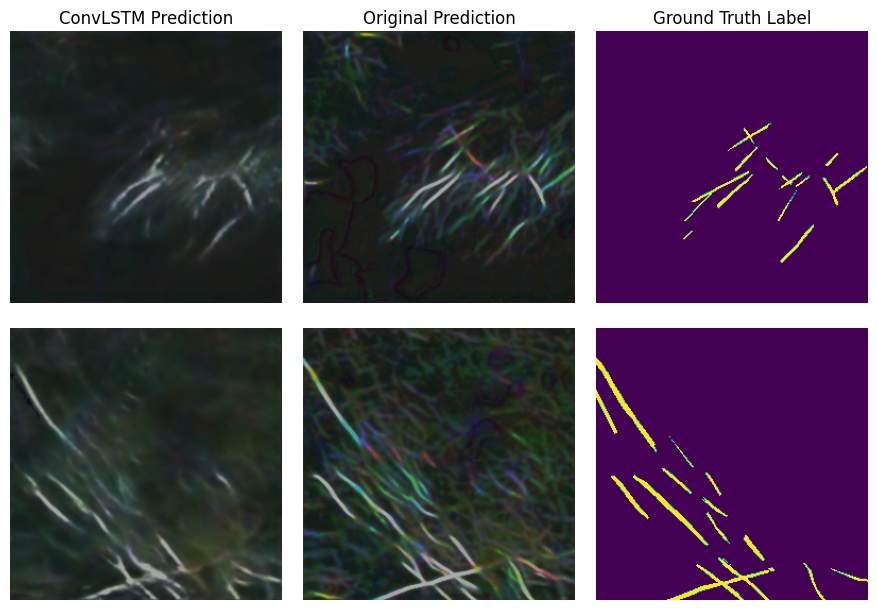

In [36]:
row_num = 2
fig, ax = plt.subplots(row_num, 3)
idx_taken = []
for ti in range(row_num):
    while True:
        sample_id = np.random.randint(y_pred.shape[0])
        this_label = ys[valid_idx[sample_id]]
        if np.mean(this_label) > 0.01 and (not sample_id in idx_taken):
            ax[ti][0].imshow(y_pred[sample_id,3,...])
            ax[ti][1].imshow(y_valid[sample_id,3,...])
            ax[ti][2].imshow(this_label)
            ax[ti][0].axis('off')
            ax[ti][1].axis('off')
            ax[ti][2].axis('off')
            if ti == 0:
                ax[ti][0].set_title('ConvLSTM Prediction')
                ax[ti][1].set_title('Original Prediction')
                ax[ti][2].set_title('Ground Truth Label')
            idx_taken.append(sample_id)
            break
fig.tight_layout()
fig.set_size_inches(9, 2.8*row_num+1)

### View History

In [37]:
history = pd.read_csv(this_model_path + 'history.csv')

In [42]:
history.tail(30)

,epoch,loss,perceptual_distance,rgb_distance,val_loss,val_perceptual_distance,val_rgb_distance
196,194,0.083464,22.224867,22.064789,0.082416,20.963148,20.781942
197,195,0.083282,22.229143,22.069429,0.082431,21.101595,20.901413
198,196,0.083185,22.263292,22.101440,0.082600,21.043425,20.861238
199,197,0.082750,22.260305,22.097061,0.082215,21.003361,20.810654
200,198,0.082723,22.242859,22.082983,0.082183,21.068844,20.879215
201,199,0.082665,22.248831,22.090181,0.082161,21.032740,20.840975
202,200,0.082598,22.277893,22.120552,0.082198,20.955254,20.775915
203,201,0.082623,22.309256,22.149761,0.082305,21.068670,20.882105
204,202,0.082627,22.300701,22.141491,0.082123,20.876486,20.699472
205,203,0.082563,22.308508,22.148067,0.082345,21.107101,20.916279


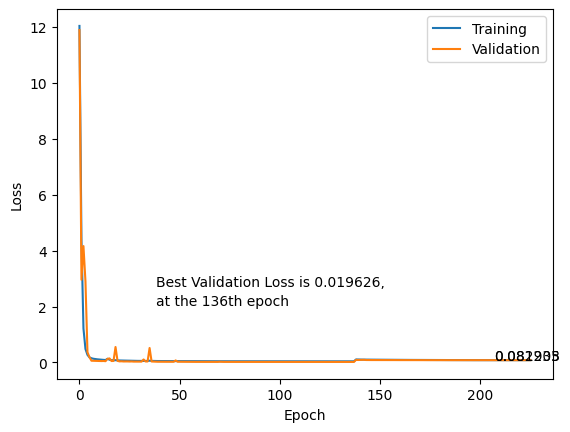

In [39]:

fig, ax = plt.subplots()

y0 = np.array(history['loss'])
y0_text = f'{y0[-1]:.6f}'
y1 = np.array(history['val_loss'])
y1_text = f'{y1[-1]:.6f}'
x = np.arange(len(y0))

ax.plot(x, y0, label='Training')
ax.plot(x, y1, label='Validation')

ax.annotate(y0_text, xy=(x[-1],y0[-1]), xytext=(x[-1]*0.92,y0[-1]+0.001))
ax.annotate(y1_text, xy=(x[-1],y1[-1]), xytext=(x[-1]*0.92,y1[-1]+0.001))

fig_best_epoch = np.argmin(y1)+1
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax.text((x_lim[1] - x_lim[0])*0.2 + x_lim[0], (y_lim[1] - y_lim[0])*0.25 + y_lim[0],
        f'Best Validation Loss is {np.min(y1):.6f},')
ax.text((x_lim[1] - x_lim[0])*0.2 + x_lim[0], (y_lim[1] - y_lim[0])*0.20 + y_lim[0],
        f'at the {fig_best_epoch}th epoch')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

fig.savefig(this_figure_path + 'Loss_history.png')

In [40]:
best_epoch

210

In [43]:
weight_fns = glob.glob(this_weight_path + '*.h5')
for i in range(len(weight_fns)):
    if weight_fns[i] == this_weight_path + f'model_weights_{best_epoch:05d}.h5':
        shutil.copy(weight_fns[i], this_weight_path + 'best_model_weights.h5')
    if not 'best' in weight_fns[i]:
        os.remove(weight_fns[i])

### Evaluation For Timesteps

In [44]:
for i in range(6):
    this_string = f'The MSE at time step {i} is {MSE_for_ndarray(y_valid[:,i,...], y_pred[:,i,...]):.6f}'
    this_string += f', RGB distance: {rgb_distance(y_valid[:,i,...], y_pred[:,i,...]):.2f}'
    print(this_string)

The MSE at time step 0 is 0.001571, RGB distance: 27.88
The MSE at time step 1 is 0.001215, RGB distance: 17.85
The MSE at time step 2 is 0.002333, RGB distance: 24.92
The MSE at time step 3 is 0.000820, RGB distance: 12.68
The MSE at time step 4 is 0.002032, RGB distance: 28.19
The MSE at time step 5 is 0.000469, RGB distance: 13.80


In [45]:
shutil.copyfile(nb_full_path, this_model_path + 'Source_code.ipynb')

'.\\saved_LSTM_model_data\\2024-04-17_003503\\Source_code.ipynb'